In [1]:
#!conda install -y -c anaconda pillow 
import PIL

# O que são Redes Neurais

Redes Neurais são algoritmos de aprendizado surpervisiodado (que podem ser utilizados de maneira não surpervisionada).  Logo, ela recebe dados de treinamento e tenta "aprender" como que esses dados de treinamento se relacionam com a saída esperada.

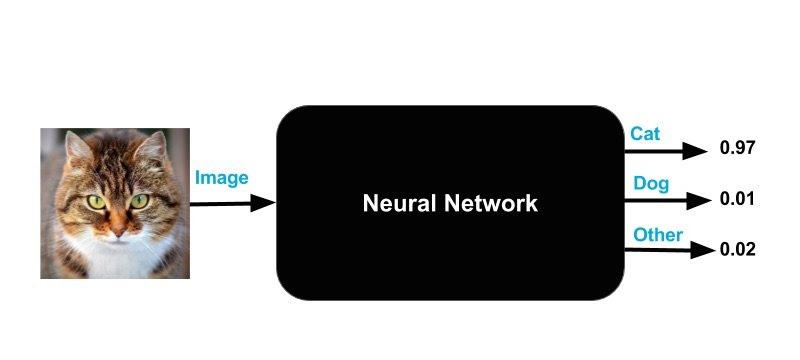

No caso da imagem acima, nós entramos com uma imagem e a rede dá a probabilidade de ser cada uma das nossas classes. Uma rede neural perfeita retornaria (1, 0, 0) for a cat (100% de chance de ser um gato; 0% de chance de ser um cachorro e 0% de chance de ser qualquer coisa que não seja nenhum gato e nem um cachorro). Na realidade, vai ser impossível de uma rede nos dar esses resultados, mas podemos conseguir algo como (0.97, 0.02, 0.01), como no exemplo da imagem.

## Mas Imagens?

Já estamos acostumados em trabalhar com dados de texto, ou dados "estruturados". O que é válidos saber é que modelos de **Machine Learning** conseguem lidar com *qualquer* tipo de dado. Desde que sejamos capazes de tratar o dado de forma correta. No fim, é sempre bom lembrar: *os computadores apenas enxergam números*.

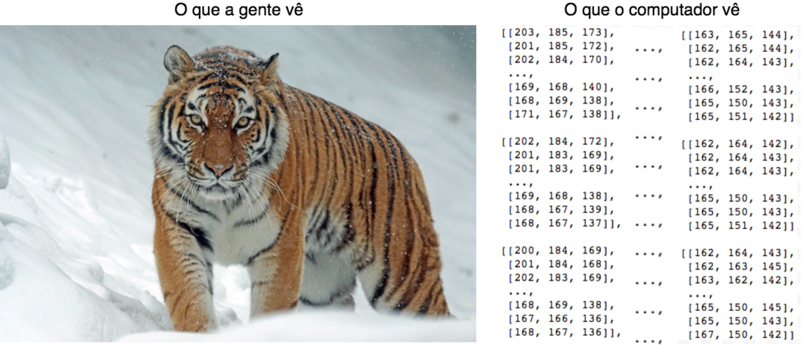


Assim, imagens são apenas um conjunto de array de números. Uma imagem 256x256 com 3 canais (RGB) pode ser traduzida como um array único de 256x256x3 = 196,608 números. Existem alguns "truques" para tratar imagens que não são quadradas ou não estão na escala de cores padrão, mas como essa aula não é uma aula de visão computacional, não focaremos nisso hoje ):


Mas teremos no pós aula !

## Tá mas o que é Treinar uma Rede Neural?

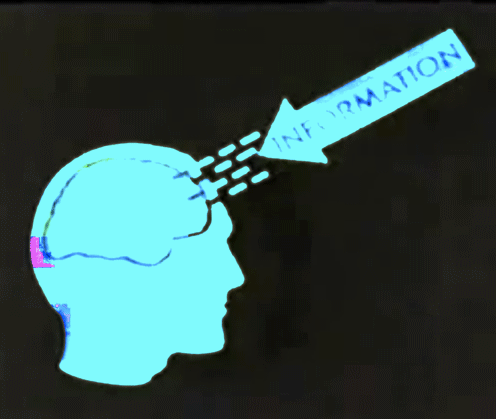

Pense que essa "caixa preta" que vocês viram tem uma série de "alavancas" que precisam ser tunadas. Essas alavancas, em um jargão mais "tecnico" são chamadas de pesos. Quando os pesos estão ajustados da maneira correta, a rede neural dá a resposta para diferentes entradas.

**Treinar uma rede neural significa ajustar essas alavancas para a forma ideal**

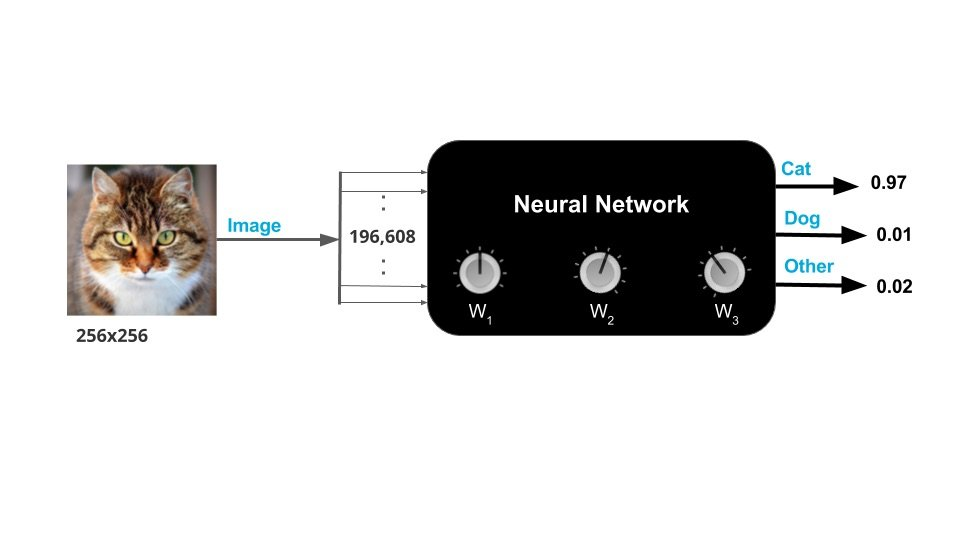

# Nossa primeira rede neural

Já vamos entrar nos detalhes de como que podemos "ajustar essas alavancas" (chamamos isso de aprender os parâmetros da rede). Mas não seria legal se pudessemos usar uma rede já treinada? E nós **podemos**.

## Conhecendo o ImageNet

O ImageNet é um projeto que visa fornecer um dataset de imagens para fins de pesquisa. Ele contém mais de 14 milhões de imagens as quais pertencem a mais de 20 mil classes. Todo os anos eles promovem o ImageNet Large Scale Visual Recognition Challenge (ILSVRC), que é basicamente uma competição anual para que os times de pesquisa avaliem seus algoritmos de visão computacional. O termo Deep Learning **voltou** a ficar famoso em 2011 graças à essa competição, quando o Alex Krizhevsky e sua equipe de pesquisa venceram a competição com uma vantagem absurda !

## Usando uma rede já treinada?
    
Entrando em um pouco mais de detalhes, se utilizassemos uma rede treinada nessas competições, teriamos a vantagem de que alguns parâmetros da rede já estariam de acordo com o nosso objetivo (no caso, classificar objetos).  Isso nos dá uma vantagem absurda do que se fossemos treinar uma rede do zero.

## De mãos ao código

Dentre vários modelos que o Keras apresenta, usaremos a rede *inception_v3*, uma rede pré treinada do pessoal da Google.

In [2]:
import keras
import numpy as np
from keras.applications import inception_v3

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

Using TensorFlow backend.


### Tratando as Imagens

O Keras possui módulos para tratarmos imagens e realizarmos aluns pré processamentos para preparar a imagem para a rede (como vimos no inicio da aula). Os passos realizados serão os seguintes:
- Carregar a imagem. Isso é feito por meio da função *load_img()*. 
- Converter a imagem do formato PIL (Python Image Library) para o formato do numpy (altura x largura x canais), usando a função *image_to_array()*.
- A rede, no caso, aceita um Tensor (array de 4 dimensões) como entrada. Assim, precisamos converter nossas imagens para esse formato. Isso é feito com a função *expand_dims()*

PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


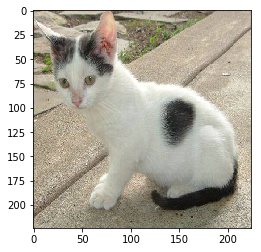

In [3]:
%matplotlib inline
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

filename = 'imgs/cat.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
#plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
#plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

### Realizando as previsões

Uma vez tendo as imagens no formato adequado, nós podemos alimentar a rede e ter nossas previsões. A imagem que nós tivemos no passo anterios deve ser **normalizada**, subtraindo a média dos dados do ImageNet. Isso é necessário porquê a rede foi treinada com imagens após o pré processamento. Realizaremos os seguintes passos:

- Pré procesamento da entrada ao subtrair a média de cada valor das imagens em cada "bloco".  Mean é um array de três elementos obtidos ao tirar a média dos pixels R,G,B de todas as imagens do ImageNet. Os valores são [ 103.939, 116.779, 123.68 ]. Isso é feito pela função preprocess_input().

- Pegar o resultado da classificação, que é um tensor de tamanho ( batchsize x 1000 ). Isso é feito por model.predict() 

- Converta o vetor obtido em algo que faça sentido para nós. 

In [4]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label)

[[('n02124075', 'Egyptian_cat', 0.57821625), ('n02123597', 'Siamese_cat', 0.39064118), ('n02123045', 'tabby', 0.018548165), ('n02127052', 'lynx', 0.0093621416), ('n02123159', 'tiger_cat', 0.0016033165)]]


## Mas será que a rede é perfeita?

PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


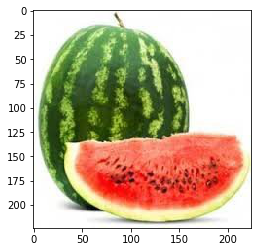

In [5]:
filename = 'imgs/watermelon.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
#plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
#plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [6]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label)

[[('n07717410', 'acorn_squash', 0.58654678), ('n07716906', 'spaghetti_squash', 0.40628368), ('n07753113', 'fig', 0.0036063662), ('n07747607', 'orange', 0.0015967068), ('n07717556', 'butternut_squash', 0.0014331089)]]


PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


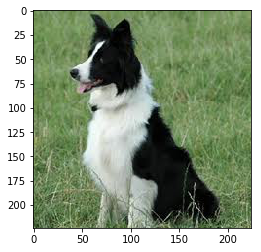

In [7]:
filename = 'imgs/sheepdog.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
#plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
#plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [8]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label)

[[('n02106166', 'Border_collie', 0.9927476), ('n02106030', 'collie', 0.0064844787), ('n02113186', 'Cardigan', 0.00065298268), ('n02105412', 'kelpie', 4.9798986e-05), ('n02105855', 'Shetland_sheepdog', 1.2980971e-05)]]


### Encontre alguns tipos de imagens que a rede classifica bem !

Parece que a rede treinada em cima da competição ILSVRC não consegue reconhecer melancias e tomates muito bem. No pós aula mostraremos tecnicas de como lidar com esse tipo de problema. Uma vez que temos redes pré treinadas, podemos criar nossa própria rede que se aproveita dessa situação !